In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

Tuning

In [2]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

Adjusting the classification threshold

ROC Curves and Area Under the Curve (AUC)


 Threshold Tuning & ROC Analysis


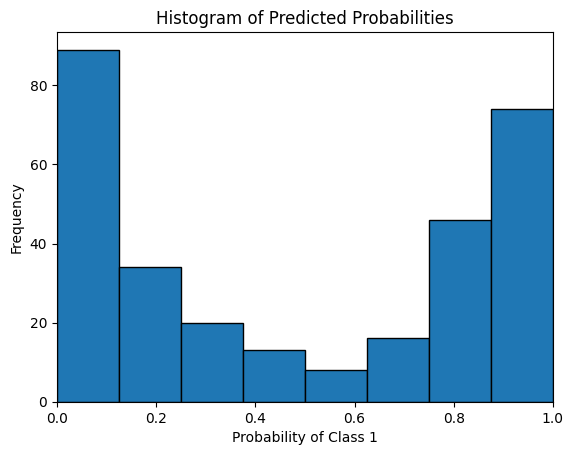


 First 10 Probabilities: [0.77 0.8  0.16 0.94 0.97 0.02 0.08 0.89 0.71 0.24]
First 10 Adjusted Predictions (thresh=0.3): [1. 1. 0. 1. 1. 0. 0. 1. 1. 0.]


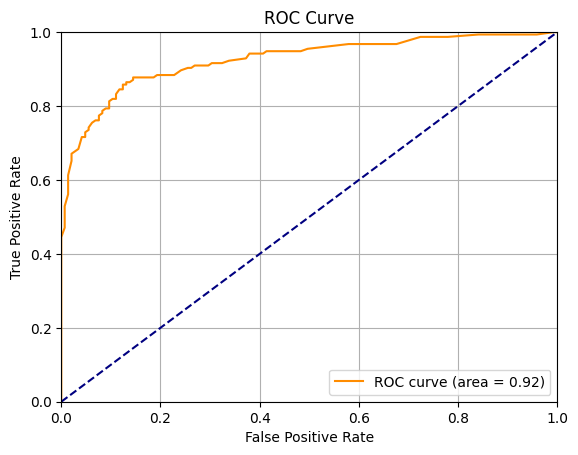


 ROC AUC Score (Probabilities): 0.9244

 Confusion Matrix (threshold = 0.5):
[[129  16]
 [ 27 128]]
Accuracy (threshold = 0.5): 0.8567


In [3]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics


# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (RandomForestClassifier in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Now, let's use the threshold_tuning_and_roc_analysis function
def threshold_tuning_and_roc_analysis(model, X_test, y_test, plot=True):
    print('\n Threshold Tuning & ROC Analysis')

    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

    # Plot histogram of predicted probabilities
    if plot:
        plt.figure()
        plt.hist(y_pred_prob, bins=8, edgecolor='k')
        plt.xlim(0, 1)
        plt.title('Histogram of Predicted Probabilities')
        plt.xlabel('Probability of Class 1')
        plt.ylabel('Frequency')
        plt.show()

        # Apply custom threshold of 0.3
        y_pred_class_custom = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3).ravel()
        print('\n First 10 Probabilities:', y_pred_prob[:10])
        print('First 10 Adjusted Predictions (thresh=0.3):', y_pred_class_custom[:10])

        # ROC Curve and AUC
        roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

        if plot:
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.title('ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='lower right')
            plt.grid(True)
            plt.show()

        print('\n ROC AUC Score (Probabilities):', round(roc_auc, 4))

        # Confusion Matrix at 0.5 threshold
        print('\n Confusion Matrix (threshold = 0.5):')
        predict_mine = (y_pred_prob > 0.5).astype(int)
        print(metrics.confusion_matrix(y_test, predict_mine))

    # Calculate and return accuracy
    accuracy = metrics.accuracy_score(y_test, (y_pred_prob > 0.5).astype(int))
    print(f'Accuracy (threshold = 0.5): {accuracy:.4f}')

    return accuracy

# Call the function and see the results
accuracy = threshold_tuning_and_roc_analysis(model, X_test, y_test, plot=True)

Tuning with cross validation score

In [4]:
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

Tuning with GridSearchCV

In [5]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

Tuning with RandomizedSearchCV

In [6]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

Tuning with searching multiple parameters simultaneously

In [7]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

Pipeline steps

In [8]:
# 2. Load Preprocessed Data
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

In [9]:
# 3. Scale the Features (Recommended for SVM, ANN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
def tuningRandomizedSearchCV(model, param_dist):
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=10,        # Number of parameter settings to sample
        cv=5,             # Cross-validation folds
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X_train, y_train)
    print("Best Parameters Found:\n", random_search.best_params_)

In [11]:
import pandas as pd
from sklearn import metrics

def evalClassModel(model, y_test, y_pred_class, show_output=False):
    if show_output:
        print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
        
        # Convert y_test to Pandas Series to use value_counts()
        y_test_series = pd.Series(y_test)
        print('Null accuracy:\n', y_test_series.value_counts())
        
        print('Percentage of ones:', y_test_series.mean())
    
    return metrics.accuracy_score(y_test, y_pred_class)

In [12]:
# 4. Train and Evaluate ML Models
methodDict = {}


def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return model

Logistic Regression

In [13]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score * 100

In [14]:
logisticRegression()

Accuracy: 0.7936507936507936
Null accuracy:
 1    127
0    125
Name: count, dtype: int64
Percentage of ones: 0.503968253968254


Random Forest 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = X_train.shape[1]
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100
     


In [16]:
randomForest()

Best Parameters Found:
 {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 4}
Accuracy: 0.8174603174603174
Null accuracy:
 1    127
0    125
Name: count, dtype: int64
Percentage of ones: 0.503968253968254


Support Vector Machine

In [17]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from scipy.stats import uniform


def svmClassifier():
    # Calculating the best parameters
    svm = SVC(probability=True)  # Enable probability estimates if needed later
    param_dist = {
        "C": uniform(0.1, 10),
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "gamma": ["scale", "auto"]
    }

    tuningRandomizedSearchCV(svm, param_dist)

    # Train SVM with the best manually set parameters (example)
    svm = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
    svm.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = svm.predict(X_test)

    # evaluate and store accuracy
    accuracy_score = evalClassModel(svm, y_test, y_pred_class, True)

    # Data for final graph
    methodDict['Support Vector Machine'] = accuracy_score * 100


In [18]:
svmClassifier()

Best Parameters Found:
 {'C': 8.424426408004217, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.8174603174603174
Null accuracy:
 1    127
0    125
Name: count, dtype: int64
Percentage of ones: 0.503968253968254


KNeighbors Classifier

In [19]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['K-Neighbors'] = accuracy_score * 100
     


In [20]:
Knn()

Best Parameters Found:
 {'weights': 'uniform', 'n_neighbors': 28}
Accuracy: 0.7777777777777778
Null accuracy:
 1    127
0    125
Name: count, dtype: int64
Percentage of ones: 0.503968253968254


Decision Tree classifier

In [21]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = X_train.shape[1]
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Decision Tree Classifier'] = accuracy_score * 100

In [22]:
treeClassifier()

Best Parameters Found:
 {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 7, 'min_samples_split': 3}
Accuracy: 0.7738095238095238
Null accuracy:
 1    127
0    125
Name: count, dtype: int64
Percentage of ones: 0.503968253968254


ANN for Deep Neural Network

Confusion Matrix:


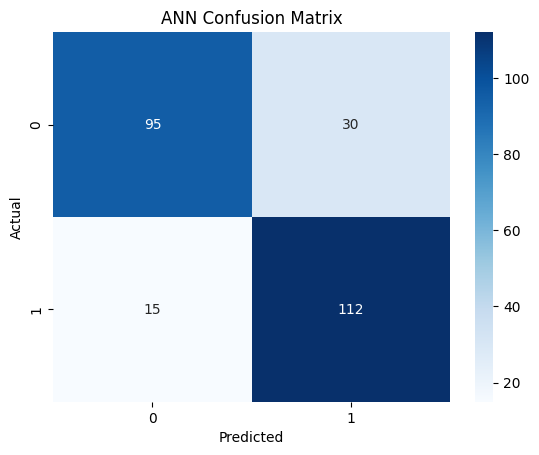


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       125
           1       0.79      0.88      0.83       127

    accuracy                           0.82       252
   macro avg       0.83      0.82      0.82       252
weighted avg       0.83      0.82      0.82       252

Accuracy Score: 0.8214285714285714


In [23]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
# Create the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
                          activation='relu',          # Activation function
                          solver='adam',              # Optimizer
                          max_iter=500,               # Increase if needed
                          random_state=42)

# Train the model
ann_model.fit(X_train, y_train)

# Predict
y_pred = ann_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("ANN Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Using evalClassModel() before Boosting and Stacking

In [24]:
import pandas as pd
from sklearn import metrics

def evalClassModel(model, y_test, y_pred_class, show_output=False):
    if show_output:
        print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
        
        # Convert y_test to Pandas Series to use value_counts()
        y_test_series = pd.Series(y_test)
        print('Null accuracy:\n', y_test_series.value_counts())
        
        print('Percentage of ones:', y_test_series.mean())
    
    return metrics.accuracy_score(y_test, y_pred_class)

Bagging

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # or any other base estimator you want


def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

In [26]:
bagging()

Accuracy: 0.7341269841269841
Null accuracy:
 1    127
0    125
Name: count, dtype: int64
Percentage of ones: 0.503968253968254


Boosting

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#uses only class predictions

def boosting():
    # Base estimator
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    
    # AdaBoost with SAMME algorithm (to avoid FutureWarning)
    boost = AdaBoostClassifier(estimator=clf, n_estimators=500, algorithm='SAMME')
    
    # Fit the model
    boost.fit(X_train, y_train)
    
    # Predict
    y_pred_class = boost.predict(X_test)
    
    # Evaluate
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    # Store accuracy
    methodDict['Boosting'] = accuracy_score * 100




In [28]:
boosting()

Accuracy: 0.8214285714285714
Null accuracy:
 1    127
0    125
Name: count, dtype: int64
Percentage of ones: 0.503968253968254


Stacking

In [29]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def stacking():
    # Base estimators
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = DecisionTreeClassifier()

    # Meta-learner
    lr = LogisticRegression()

    # Stacking model using sklearn
    stack = StackingClassifier(
        estimators=[('knn', clf1), ('rf', clf2), ('dt', clf3)],
        final_estimator=lr,
        cv=5
    )

    # Fit model
    stack.fit(X_train, y_train)
    
    # Predict
    y_pred_class = stack.predict(X_test)
    
    # Evaluate
    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    # Save for graph
    methodDict['Stacking'] = accuracy_score * 100

In [30]:
stacking()

Accuracy: 0.7738095238095238
Null accuracy:
 1    127
0    125
Name: count, dtype: int64
Percentage of ones: 0.503968253968254


Plot Success

In [31]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')

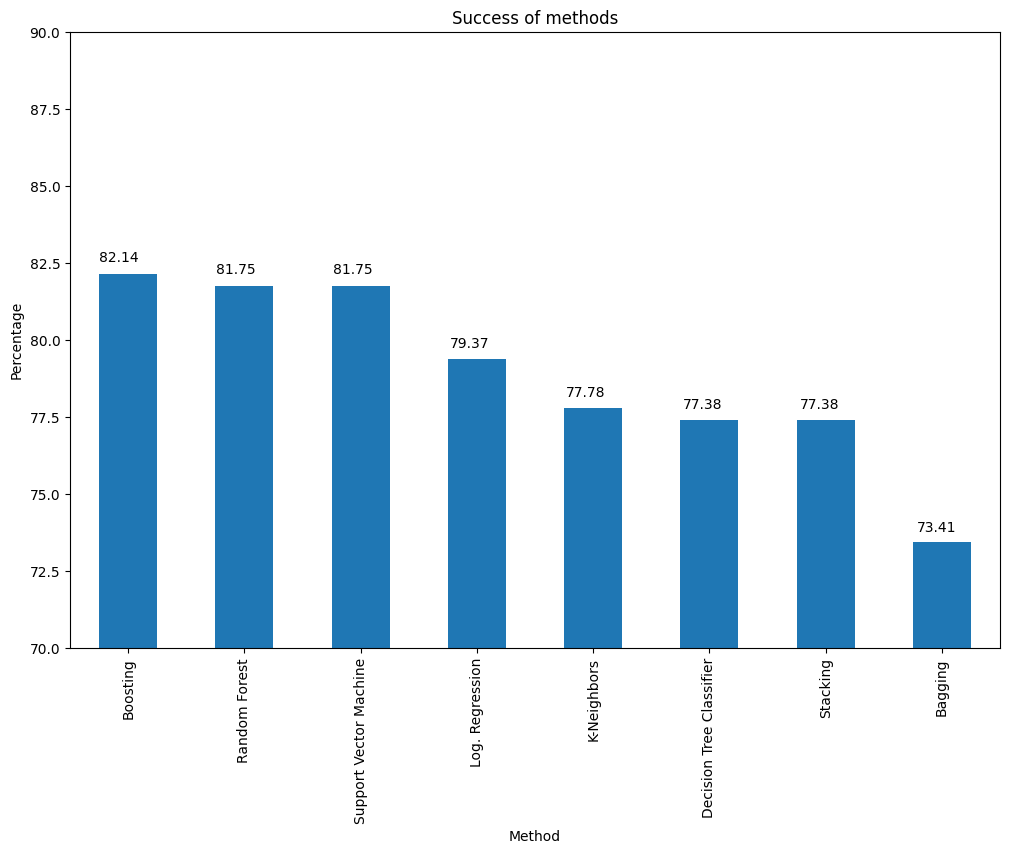

In [32]:
plotSuccess()

Creating predictions on test set

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# If X is a NumPy array, convert it to a DataFrame first
X = pd.DataFrame(X)

# Save original indices
X = X.reset_index(drop=False)  # Adds old index as a column
original_indices = X['index']

# Remove the added 'index' column from feature set
X = X.drop(columns=['index'])

# Now split your dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Grab original test indices
test_indices = original_indices.iloc[X_test.index].reset_index(drop=True)

# Set test DataFrame index to match original values
X_test = X_test.reset_index(drop=True)
X_test.index = test_indices


In [34]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=500, algorithm='SAMME')
clf.fit(X_train, y_train)

dfTestPredictions = clf.predict(X_test)

# Save predictions with original test indices
results = pd.DataFrame({
    'Index': X_test.index,
    'Treatment': dfTestPredictions
})

results.to_csv('results.csv', index=False)
results.head()


,Index,Treatment
0,521,1
1,737,1
2,740,0
3,660,1
4,411,1


Submission

Feature Importance

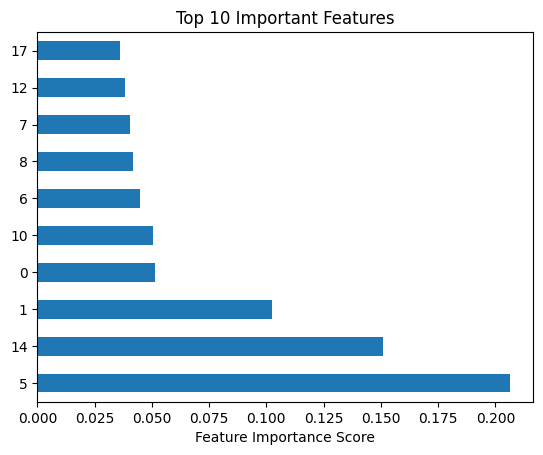

In [35]:
importances = clf.feature_importances_
feature_names = X_train.columns  # If using a DataFrame
feat_importance = pd.Series(importances, index=feature_names)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()


Saving the model

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
df = pd.read_csv("mental_health_survey_data.csv")

# Drop irrelevant columns
df_cleaned = df.drop(columns=['Timestamp', 'comments'])

# Handle missing values
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Define features and target
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = df_cleaned[feature_cols]
y = df_cleaned['treatment']

# Encode categorical features
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model
model = RandomForestClassifier()
model.fit(X_scaled, y.values.ravel())

# Save model, scaler, and encoders
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'encoders.pkl')

print("Model, scaler, and label encoders saved successfully!")

C:\Users\ghole\AppData\Local\Temp\ipykernel_10956\3043667304.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
C:\Users\ghole\AppData\Local\Temp\ipykernel_10956\3043667304.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Model, scaler, and label encoders saved successfully!
